
Personal Finance Tracker
1. Add Income
2. Add Expense
3. Edit Transaction
4. View Summary
5. View Expense Chart
6. Save Data
7. Exit


Choose an option:  4



Total Income: $246.49
Total Expenses: $117.58
Net Savings: $128.91

Transactions:
Expense: $60.44 | Category: Food | Date: 10/26/2024
Expense: $44.38 | Category: Food | Date: 10/26/2024
Expense: $12.76 | Category: Shopping | Date: 11/01/2024
Income: $96.15 | Category:  | Date: 11/01/2024
Income: $150.34 | Category:  | Date: 10/24/2024

Personal Finance Tracker
1. Add Income
2. Add Expense
3. Edit Transaction
4. View Summary
5. View Expense Chart
6. Save Data
7. Exit


Choose an option:  5


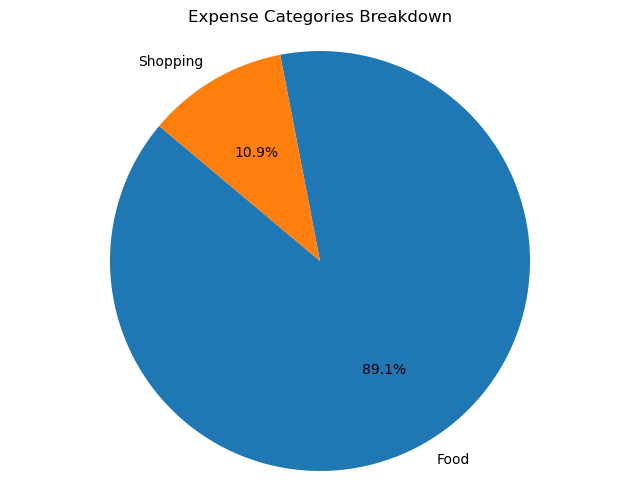


Personal Finance Tracker
1. Add Income
2. Add Expense
3. Edit Transaction
4. View Summary
5. View Expense Chart
6. Save Data
7. Exit


Choose an option:  7


Data saved to finance_data.csv
Exiting in 3...
Exiting in 2...
Exiting in 1...
Done!


In [3]:
import csv
import os
import time
import matplotlib.pyplot as plt
from datetime import datetime

class FinanceTracker:
    def __init__(self, filename='finance_data.csv'):
        self.filename = filename
        self.income = 0.0
        self.expenses = 0.0
        self.transactions = []
        self.load_data()

    def load_data(self):
        if os.path.exists(self.filename):
            with open(self.filename, 'r') as file:
                reader = csv.reader(file)
                next(reader)  # Skip header
                for row in reader:
                    if len(row) < 4:  # Ensure there are at least 4 values
                        print(f"Skipping invalid row: {row}")
                        continue  # Skip invalid rows
                    transaction_type, amount, category, date = row
                    amount = float(amount)
                    self.transactions.append((transaction_type, amount, category, date))
                    if transaction_type == 'Income':
                        self.income += amount
                    elif transaction_type == 'Expense':
                        self.expenses += amount

    def add_income(self, amount, date):
        self.transactions.append(('Income', amount, '', date))
        self.income += amount
        print(f'Added income: ${amount:.2f} on {date}')

    def add_expense(self, amount, category, date):
        self.transactions.append(('Expense', amount, category, date))
        self.expenses += amount
        print(f'Added expense: ${amount:.2f} under {category} on {date}')

    def edit_transaction(self):
        print("\nSelect a transaction to edit:")
        for idx, transaction in enumerate(self.transactions):
            print(f"{idx + 1}. {transaction[0]}: ${transaction[1]:.2f} | Category: {transaction[2]} | Date: {transaction[3]}")

        choice = int(input("Enter the transaction number to edit: ")) - 1
        if 0 <= choice < len(self.transactions):
            transaction = self.transactions[choice]
            transaction_type, amount, category, date = transaction

            if transaction_type == 'Income':
                new_amount = float(input(f"Enter new income amount (current: ${amount:.2f}): "))
                new_date = input(f"Enter new date (current: {date}) or type 'today': ")
                if new_date.lower() == 'today':
                    new_date = datetime.now().strftime('%m/%d/%Y')
                self.transactions[choice] = ('Income', new_amount, '', new_date)
                self.income += new_amount - amount
                print(f'Updated income to: ${new_amount:.2f} on {new_date}')

            elif transaction_type == 'Expense':
                new_amount = float(input(f"Enter new expense amount (current: ${amount:.2f}): "))
                new_category = input(f"Enter new category (current: {category}): ")
                new_date = input(f"Enter new date (current: {date}) or type 'today': ")
                if new_date.lower() == 'today':
                    new_date = datetime.now().strftime('%m/%d/%Y')
                self.transactions[choice] = ('Expense', new_amount, new_category, new_date)
                self.expenses += new_amount - amount
                print(f'Updated expense to: ${new_amount:.2f} under {new_category} on {new_date}')
        else:
            print("Invalid transaction number.")

    def view_summary(self):
        print(f'\nTotal Income: ${self.income:.2f}')
        print(f'Total Expenses: ${self.expenses:.2f}')
        print(f'Net Savings: ${self.income - self.expenses:.2f}')
        print('\nTransactions:')
        for transaction in self.transactions:
            print(f'{transaction[0]}: ${transaction[1]:.2f} | Category: {transaction[2]} | Date: {transaction[3]}')

    def save_data(self):
        with open(self.filename, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Transaction Type', 'Amount', 'Category', 'Date'])
            writer.writerows(self.transactions)
        print('Data saved to', self.filename)

    def view_expense_chart(self):
        categories = {}
        for transaction in self.transactions:
            if transaction[0] == 'Expense':
                category = transaction[2]
                amount = transaction[1]
                if category in categories:
                    categories[category] += amount
                else:
                    categories[category] = amount

        # Create a pie chart
        plt.figure(figsize=(8, 6))
        plt.pie(categories.values(), labels=categories.keys(), autopct='%1.1f%%', startangle=140)
        plt.title('Expense Categories Breakdown')
        plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
        plt.show()

def main():
    tracker = FinanceTracker()
    
    while True:
        print("\nPersonal Finance Tracker")
        print("1. Add Income")
        print("2. Add Expense")
        print("3. Edit Transaction")
        print("4. View Summary")
        print("5. View Expense Chart")
        print("6. Save Data")
        print("7. Exit")
        
        choice = input("Choose an option: ")

        if choice == '1':
            amount = float(input("Enter income amount: "))
            date_input = input("Enter date (MM/DD/YYYY) or type 'today': ")
            if date_input.lower() == 'today':
                date = datetime.now().strftime('%m/%d/%Y')
            else:
                date = date_input
            tracker.add_income(amount, date)
        elif choice == '2':
            amount = float(input("Enter expense amount: "))
            category = input("Enter expense category (e.g., food, subscription, shopping, education, trip): ")
            date_input = input("Enter date (MM/DD/YYYY) or type 'today': ")
            if date_input.lower() == 'today':
                date = datetime.now().strftime('%m/%d/%Y')
            else:
                date = date_input
            tracker.add_expense(amount, category, date)
        elif choice == '3':
            tracker.edit_transaction()
        elif choice == '4':
            tracker.view_summary()
        elif choice == '5':
            tracker.view_expense_chart()
        elif choice == '6':
            tracker.save_data()
        elif choice == '7':
            tracker.save_data()
            for i in range(3, 0, -1):
                print(f"Exiting in {i}...")
                time.sleep(1)
            print("Done!")
            break
        else:
            print("Invalid option. Please try again.")

if __name__ == '__main__':
    main()